# HW2 - Lorenzo Mazzocco

.

# QUESTION 1

In [1]:
import random
import math
import numpy as np

E_min = 1   #eV
E_max = 1e6 #eV

In [2]:
def slowing_down(A, nps):
    E_histories = []
    L_histories = []
    E = []
    L = []
    
    for i in range(nps):
        E_history = [E_max]
        L_history = [0]
        while E_history[-1] >= E_min:
            eta = random.uniform(-1,1) # get scattering polar angle cosine in COM (uniform distribution)
            E_new = E_history[-1]*(A**2 + 1 + 2*A*eta)/(A**2 + 1 + 2*A) # get new energy given initial energy and scattering angle in COM
            E_history.append(E_new)
            L_history.append(np.log(E_max/E_new))
            E.append(E_new)
            L.append(np.log(E_max/E_new))
        E.pop()
        L.pop()
        E_histories.append(E_history[:-1])
        L_histories.append(L_history[:-1])
    return E, L, E_histories

In [3]:
H1_E, H1_L, H1_histories = slowing_down(1, 100000)

In [4]:
H2_E, H2_L, H2_histories = slowing_down(2, 50000)

In [5]:
C12_E, C12_L, C12_histories = slowing_down(12, 50000)

## a)

We can use a collision estimator to evaluate the flux $\phi$. That means that the estimated flux for energy group $g$ is (in our case $\Sigma_t = \Sigma_s$):

$$ \phi_g = \frac{1}{W}\sum_{i\in coll,g}\frac{w_i}{\Sigma_s}$$

In our case each particle has a weight of 1, so the estimated flux becomes:

$$ \phi_g = \frac{N_{coll,g}}{N_p\Sigma_s} $$

where $N_{coll,g}$ is the total number of collisions in energy group $g$ and $N_p$ is the total number of simulated particles.

We assume an atomic density of 1 $cm^{-3}$ using the following cross sections from ENDF-VII:

In [6]:
sigma_H1 = 20.478e-24  # 1/cm
sigma_H2 = 3.3949e-24   # 1/cm
sigma_C12 = 4.7392e-24  # 1/cm

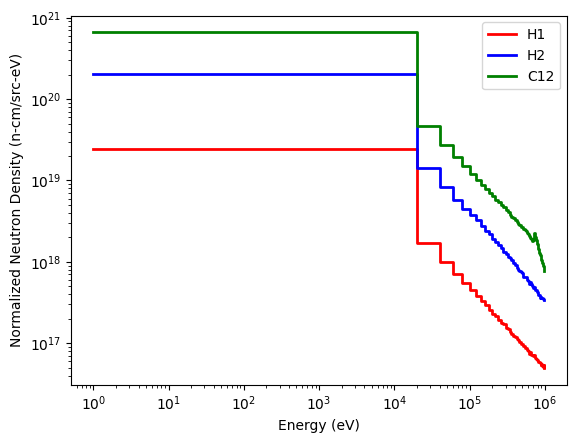

In [7]:
import matplotlib.pyplot as plt

H1_counts, H1_bins = np.histogram(H1_E, bins=50)
H1_normalized_counts = H1_counts/(100000*(H1_bins[1]-H1_bins[0])*sigma_H1)

H2_counts, H2_bins = np.histogram(H2_E, bins=50)
H2_normalized_counts = H2_counts/(50000*(H2_bins[1]-H2_bins[0])*sigma_H2)

C12_counts, C12_bins = np.histogram(C12_E, bins=50)
C12_normalized_counts = C12_counts/(50000*(C12_bins[1]-C12_bins[0])*sigma_C12)

plt.plot(H1_bins[:-1], H1_normalized_counts, drawstyle='steps-post', linewidth=2, color='r', label='H1')
plt.plot(H2_bins[:-1], H2_normalized_counts, drawstyle='steps-post', linewidth=2, color='b', label='H2')
plt.plot(C12_bins[:-1], C12_normalized_counts, drawstyle='steps-post', linewidth=2, color='g', label='C12')


plt.xscale('log')
plt.yscale('log')
plt.xlabel("Energy (eV)")
plt.ylabel("Normalized Neutron Density (n-cm/src-eV)")
plt.legend()

## b)

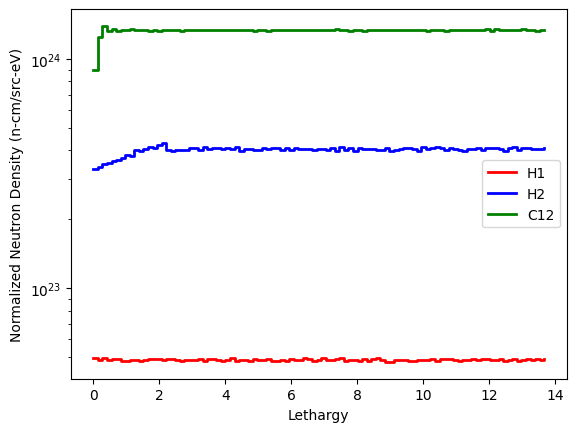

In [8]:
H1_counts, H1_bins = np.histogram(H1_L, bins=100)
H1_normalized_counts = H1_counts/(100000*(H1_bins[1]-H1_bins[0])*sigma_H1)

H2_counts, H2_bins = np.histogram(H2_L, bins=100)
H2_normalized_counts = H2_counts/(50000*(H2_bins[1]-H2_bins[0])*sigma_H2)

C12_counts, C12_bins = np.histogram(C12_L, bins=100)
C12_normalized_counts = C12_counts/(50000*(C12_bins[1]-C12_bins[0])*sigma_C12)

plt.plot(H1_bins[:-1], H1_normalized_counts, drawstyle='steps-post', linewidth=2, color='r', label='H1')
plt.plot(H2_bins[:-1], H2_normalized_counts, drawstyle='steps-post', linewidth=2, color='b', label='H2')
plt.plot(C12_bins[:-1], C12_normalized_counts, drawstyle='steps-post', linewidth=2, color='g', label='C12')

plt.yscale('log')
plt.xlabel("Lethargy")
plt.ylabel("Normalized Neutron Density (n-cm/src-eV)")
plt.legend()

(Please note that the bins used for the plots above do NOT include the source energy of 1 MeV)

First of all we can see that H1 has a lower flux, this is because there neutrons stay alive for a shorter time compared to media with lower $\sigma_s$ and lower average energy loss.

Then we can see that both the H2 and C12 spectra show a discontinuity at lower lethargies. This is due to the fact that the energy region after $\alpha E_0$ is not accessible to neutrons that only collided once. As a consequence the flux is going to drop locally after this point. As additional verification of the phenomenon one can compute the end of the region using the final energy distribution for COM-isotropic elastic scattering, which is $\alpha E_0$. One can show that $\alpha_{H2} < \alpha_{C12}$ therefore the cutoff for C12 is located at a lower lethargy. Since $\alpha_{H1} = 0$ this feature is not found in the H1 spectrum.

.

## c)

For COM-isotropic elastic scattering one can derive the following analytical estimate:
$n = \frac{1}{\xi}ln\left(\frac{E_{max}}{E_{min}}\right)$

In [9]:
def compute_slowing_down_montecarlo(E_histories):
    nn = []
    for history in E_histories:
        nn.append(len(history))
    mean = np.mean(nn)
    std = np.std(nn)
    return mean, std

def compute_slowing_down_analytical(A, E_min, E_max):
    alpha = ((A-1)/(A+1))**2
    if alpha > 0:
        xi = 1+alpha*np.log(alpha)/(1-alpha)
    else:
        xi = 1
    n = np.log(E_max/E_min)/xi
    return n

In [10]:
H1_mean, H1_std = compute_slowing_down_montecarlo(H1_histories)
H2_mean, H2_std = compute_slowing_down_montecarlo(H2_histories)
C12_mean, C12_std = compute_slowing_down_montecarlo(C12_histories)

H1_analytical = compute_slowing_down_analytical(1, E_min, E_max)
H2_analytical = compute_slowing_down_analytical(2, E_min, E_max)
C12_analytical = compute_slowing_down_analytical(12, E_min, E_max)

In [11]:
format_string = "{:>4}  {:>10.1f}  {:>8.1f}  {:>12.1f}"

print("{:<5}  {:>7}  {:>10}  {:>13}".format("Nuclide", "Mean", "Std Dev", "Analytical"))
print(format_string.format("H1", H1_mean, H1_std, H1_analytical))
print(format_string.format("H2", H2_mean, H2_std, H2_analytical))
print(format_string.format("C12", C12_mean, C12_std, C12_analytical))

Nuclide     Mean     Std Dev     Analytical
  H1        14.8       3.7          13.8
  H2        19.8       3.5          19.0
 C12        88.3       5.7          87.6


# QUESTION 2

Usually to study absorption resonances we need both the radiative capture and fission component. Fortunately for U238 fission is a threshold reaction (from the MeV region onwards) and in this case the resonance is located well below that energy value.

## a)
The maximum value of the cross section if found when $E=E_0$

In [12]:
# Parameters
Gamma_n = (1.577952E-02)*1.6E-19 #J
Gamma_g = (2.300000E-02)*1.6E-19 #J
E0 = (9.251992E+02)*1.6E-19 #J
a =  0.94800 #barns^0.5
A = 238

# Computation of the maximum
E = E0
Gamma = Gamma_n+Gamma_g

h = 6.626E-34 #Js
pi = 3.14
m = 1.67E-27 #Kg
r = (((h**2)/(2*pi*m))*(1+A)/(E0*A))*1E28 #barns

sigma_pot = 4*pi*(a**2) #barns
q = 2*math.sqrt(r*sigma_pot) #barns

x = 2*(E-E0)/Gamma
psi = 1/(1+x**2)
chi = x/(1+x**2)

sigma_abs_max = (Gamma_n/Gamma)*(Gamma_g/Gamma)*math.sqrt(E0/E)*r*psi #barns

print("Sigma absorption max: {:.1f} b".format(sigma_abs_max))

Sigma absorption max: 685.3 b


.

## b)
The parameter Gamma is just the width of the resonance at half height at 0K, here's a simple proof:

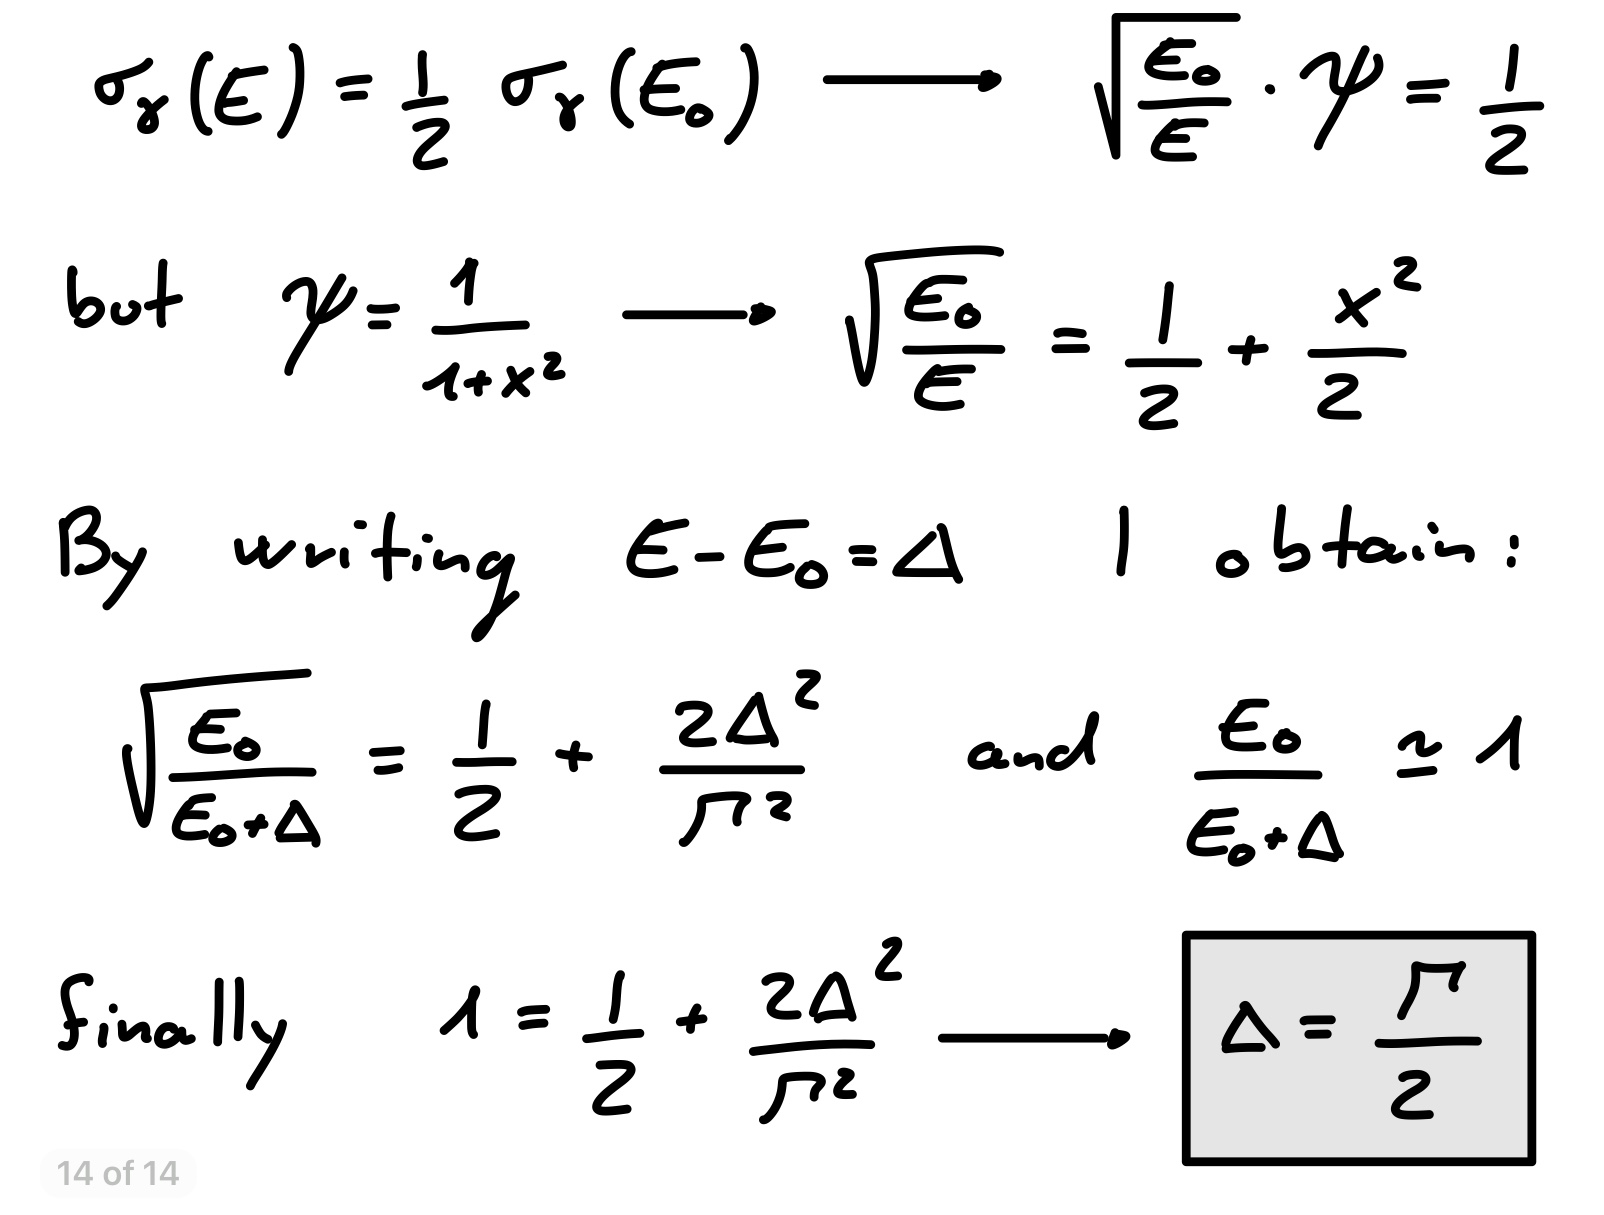

 Therefore the calculation is very simple:

In [13]:
E1 = (E0-Gamma/2)/(1.6E-19) #eV
E2 = (E0+Gamma/2)/(1.6E-19) #eV
print("Lower energy: {:.3f} eV".format(E1))
print("Hiher energy: {:.3f} eV".format(E2))

Lower energy: 925.180 eV
Hiher energy: 925.219 eV


We can also check that those energies are correct by plotting the result:

(0.0, 753.8794617207859)

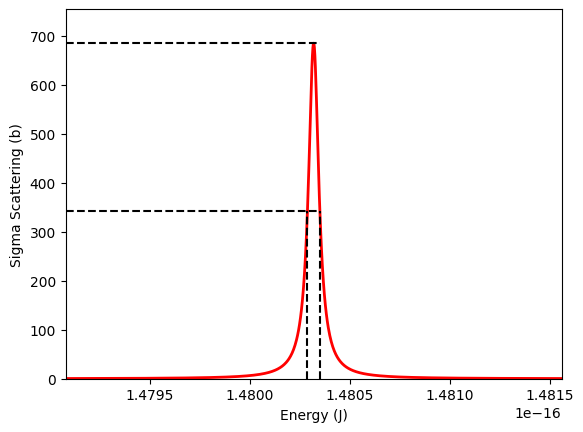

In [14]:
E1 = E1*(1.6E-19) #J
E2 = E2*(1.6E-19) #J

EE = np.linspace(E0-20*Gamma, E0+20*Gamma, 1000)
ss = []

for E in EE:
    x = 2*(E-E0)/Gamma
    psi = 1/(1+x**2)
    chi = x/(1+x**2)

    sigma_abs = (Gamma_n/Gamma)*(Gamma_g/Gamma)*math.sqrt(E0/E)*r*psi #barns
    ss.append(sigma_abs)
    
plt.plot(EE, ss, linewidth=2, color='r')
plt.vlines([E1,E2],0,sigma_abs_max/2, linestyles='dashed', color='k')
plt.hlines([sigma_abs_max, sigma_abs_max/2], min(EE), E2, linestyles='dashed', color='k')
plt.xlabel("Energy (J)")
plt.ylabel("Sigma Scattering (b)")
plt.xlim(min(EE),max(EE))
plt.ylim(0,1.1*sigma_abs_max)

.

## c)
This time the derivation is a little more complex:

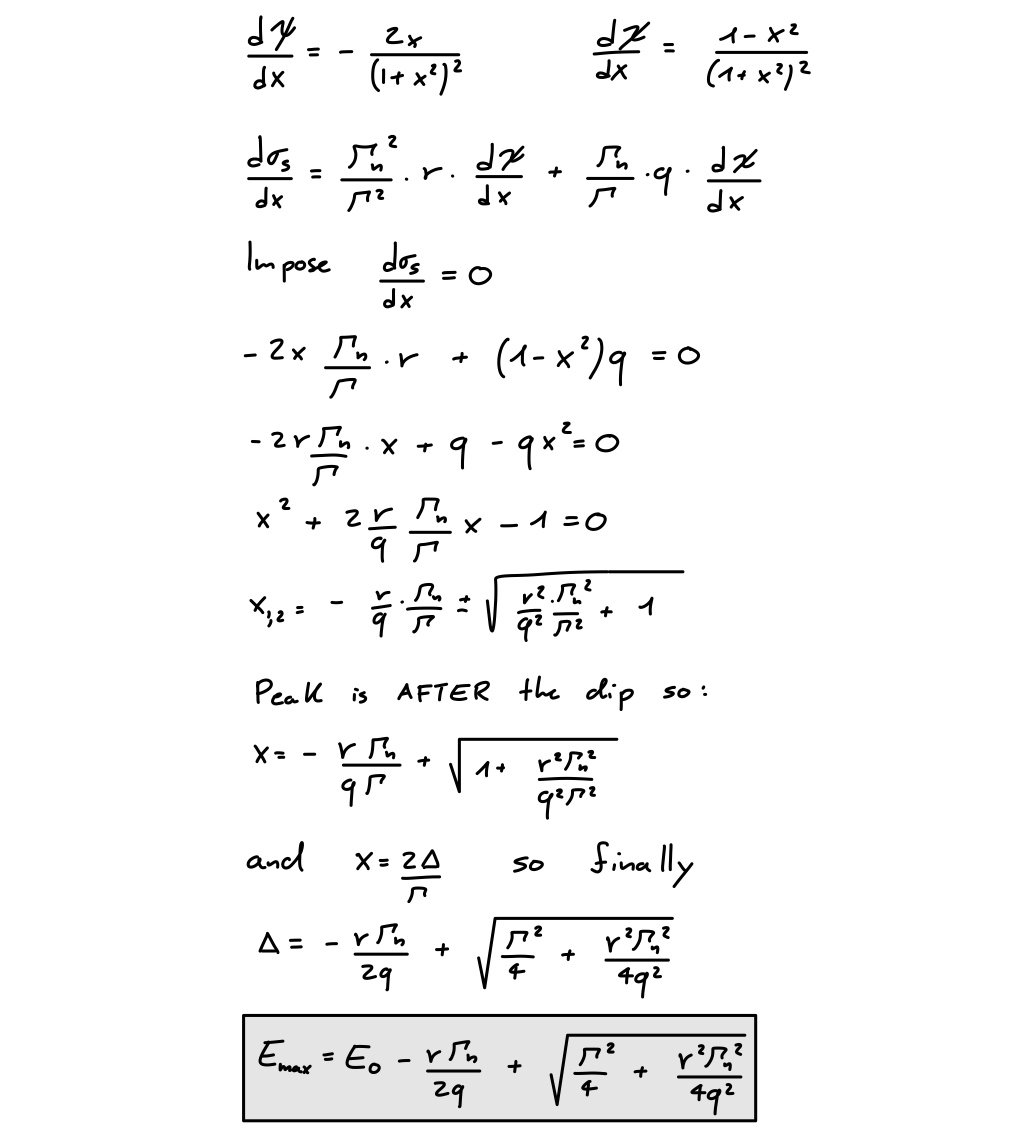

In [15]:
# COMPUTE LOCATION
y = r*Gamma_n/(2*q) #J    
E_max = E0 - y + math.sqrt(y**2 + Gamma**2/4) #J

# FIND MAXIMUM
E = E_max

x = 2*(E-E0)/Gamma
psi = 1/(1+x**2)
chi = x/(1+x**2)

sigma_s_max = (Gamma_n/Gamma)*(Gamma_n/Gamma)*(r*psi+(Gamma/Gamma_n)*q*chi) + sigma_pot #barns

print("The location of the maximum is at: {:.3f} eV".format(E_max/(1.6E-19)))
print("The corresponding value of sigma_s is: {:.1f} b".format(sigma_s_max))

The location of the maximum is at: 925.202 eV
The corresponding value of sigma_s is: 492.5 b


And here is a simple plot of the resonance to prove that E_max is correct:

In [16]:
EE = np.linspace(E0-40*Gamma, E0+40*Gamma, 10000)
ss = []

for E in EE:
    h = 6.626E-34 #Js
    pi = 3.14
    m = 1.67E-27 #Kg
    r = (((h**2)/(2*pi*m))*(1+A)/(E0*A))*1E28 #barns

    x = 2*(E-E0)/Gamma
    psi = 1/(1+x**2)
    chi = x/(1+x**2)

    sigma_pot = 4*pi*(a**2) #barns
    q = 2*math.sqrt(r*sigma_pot) #barns

    sigma_s = (Gamma_n/Gamma)*(Gamma_n/Gamma)*(r*psi+(Gamma/Gamma_n)*q*chi) + sigma_pot #barns
    ss.append(sigma_s)

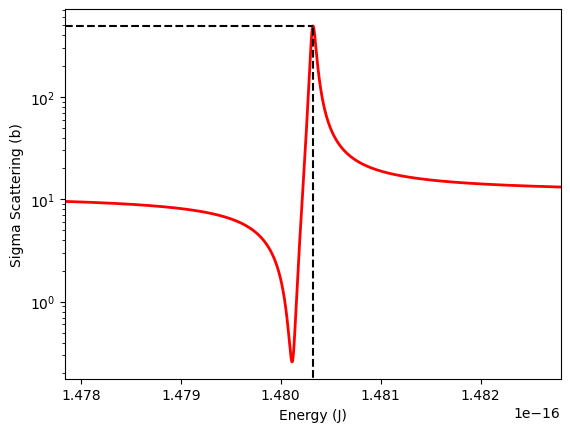

In [17]:
plt.plot(EE, ss, linewidth=2, color='r')
plt.vlines(E_max,0,sigma_s_max, linestyles='dashed', color='k')
plt.hlines(sigma_s_max, min(EE), E_max, linestyles='dashed', color='k')
plt.xlabel("Energy (J)")
plt.ylabel("Sigma Scattering (b)")
plt.xlim(min(EE),max(EE))
plt.yscale('log')

.

## d)
One has to use the Feeddeva function.

In [18]:
import scipy.integrate as integrate
import scipy.special as special


TT = [1e-20, 1000, 5000]

ss_abs_T = []
ss_s_T = []

for T in TT:

    k = 1.380649E-23 #J/K
    
    EE = np.linspace(E0-400*Gamma, E0+400*Gamma, 1000)

    ss_abs_E = []
    ss_s_E = []
    
    for E in EE:
        x = 2*(E-E0)/Gamma
        
        xi = (Gamma/4)*math.sqrt(A/(k*T*E0))
        arg = x+1j
        Feddeeva = special.wofz(arg*xi)
        
        psi = math.sqrt(pi)*np.real(xi*Feddeeva)
        chi = math.sqrt(pi)*np.imag(xi*Feddeeva)
        
        sigma_abs_T = (Gamma_n/Gamma)*(Gamma_g/Gamma)*math.sqrt(E0/E)*r*psi #barns
        sigma_s_T = (Gamma_n/Gamma)*(Gamma_n/Gamma)*(r*psi+(Gamma/Gamma_n)*q*chi) + sigma_pot #barns
        
        ss_abs_E.append(sigma_abs_T)
        ss_s_E.append(sigma_s_T)
    
    ss_abs_T.append(ss_abs_E)
    ss_s_T.append(ss_s_E)

Text(0, 0.5, 'Sigma Absorption (b)')

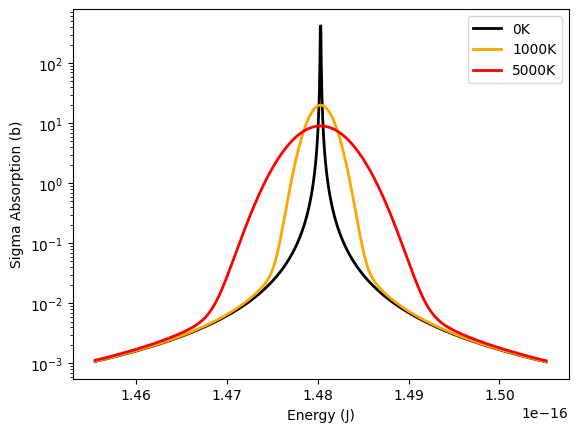

In [19]:
plt.plot(EE, ss_abs_T[0], linewidth=2, color='k', label='0K')
plt.plot(EE, ss_abs_T[1], linewidth=2, color='orange', label='1000K')
plt.plot(EE, ss_abs_T[2], linewidth=2, color='r', label='5000K')
plt.yscale('log')
plt.legend()

plt.xlabel("Energy (J)")
plt.ylabel("Sigma Absorption (b)")

Text(0, 0.5, 'Sigma Scattering (b)')

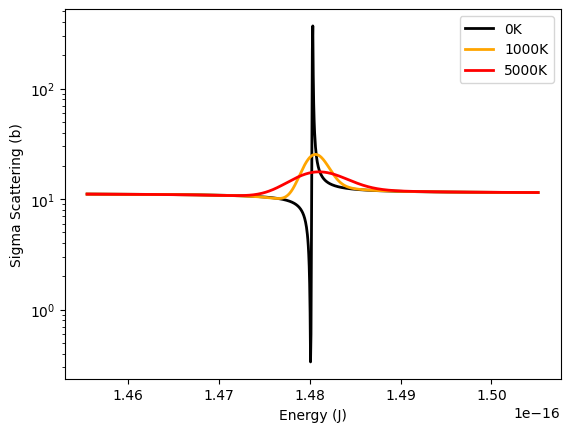

In [20]:
plt.plot(EE, ss_s_T[0], linewidth=2, color='k', label='0K')
plt.plot(EE, ss_s_T[1], linewidth=2, color='orange', label='1000K')
plt.plot(EE, ss_s_T[2], linewidth=2, color='r', label='5000K')
plt.yscale('log')
plt.legend()

plt.xlabel("Energy (J)")
plt.ylabel("Sigma Scattering (b)")

# QUESTION 3

## a)
For $f(x)$ to be a PDF it has to respect the normalization condition:

$$ \int_{-\infty}^{\infty} f(x) dx = 1 $$

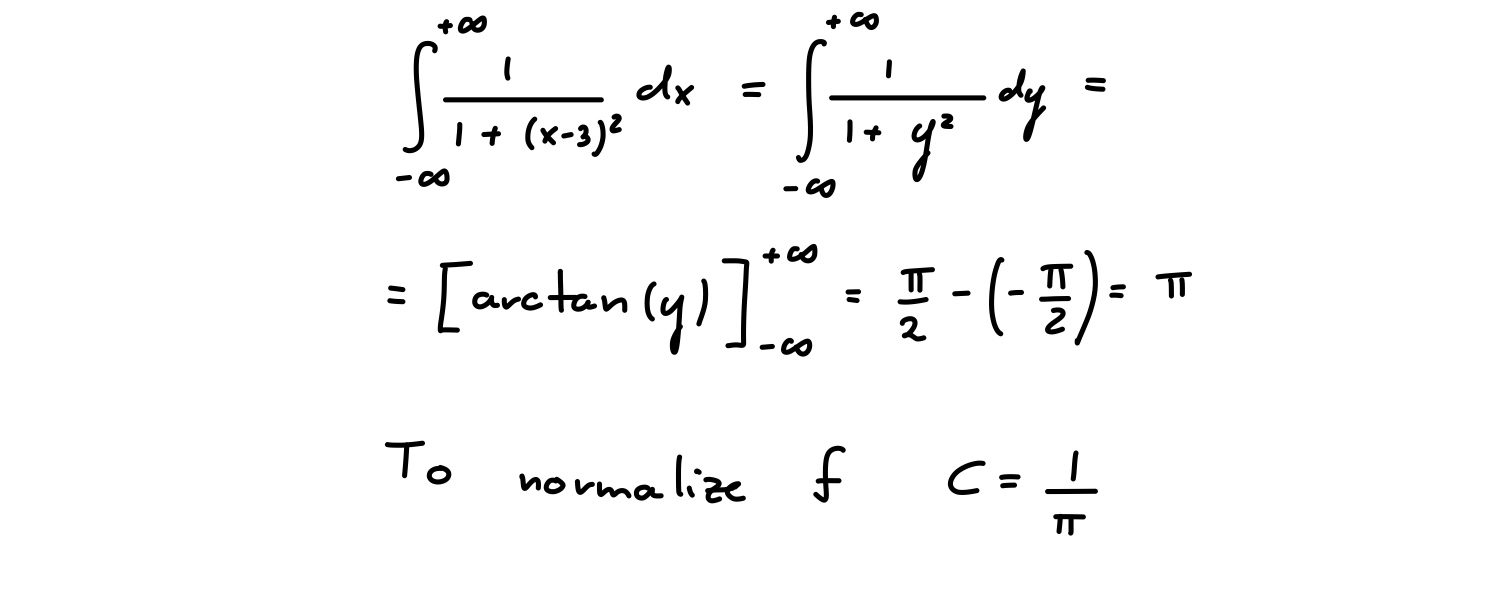

Therefore $C=\frac{1}{\pi}$

## b)
The CDF is defined as:

$$ F(x) = \int_{-\infty}^x f(y) dy $$

Therefore following the same integration we did above:

$$ F(x) = \frac{1}{\pi} \left[arctan(y-3) \right]_{-\infty}^x = \frac{1}{\pi}arctan(x-3) + \frac{1}{2} $$

## c)
To run a direct sampling scheme we need to invert the CDF. With this particular function it is possible:

$$ y = F(x) = \frac{1}{\pi}arctan(x-3) + \frac{1}{2} $$
and
$$ x = F^{-1}(y) =  3+tan(\pi(y-\frac{1}{2})) $$

We can now try to reconstruct the PDF using a lot of samples:

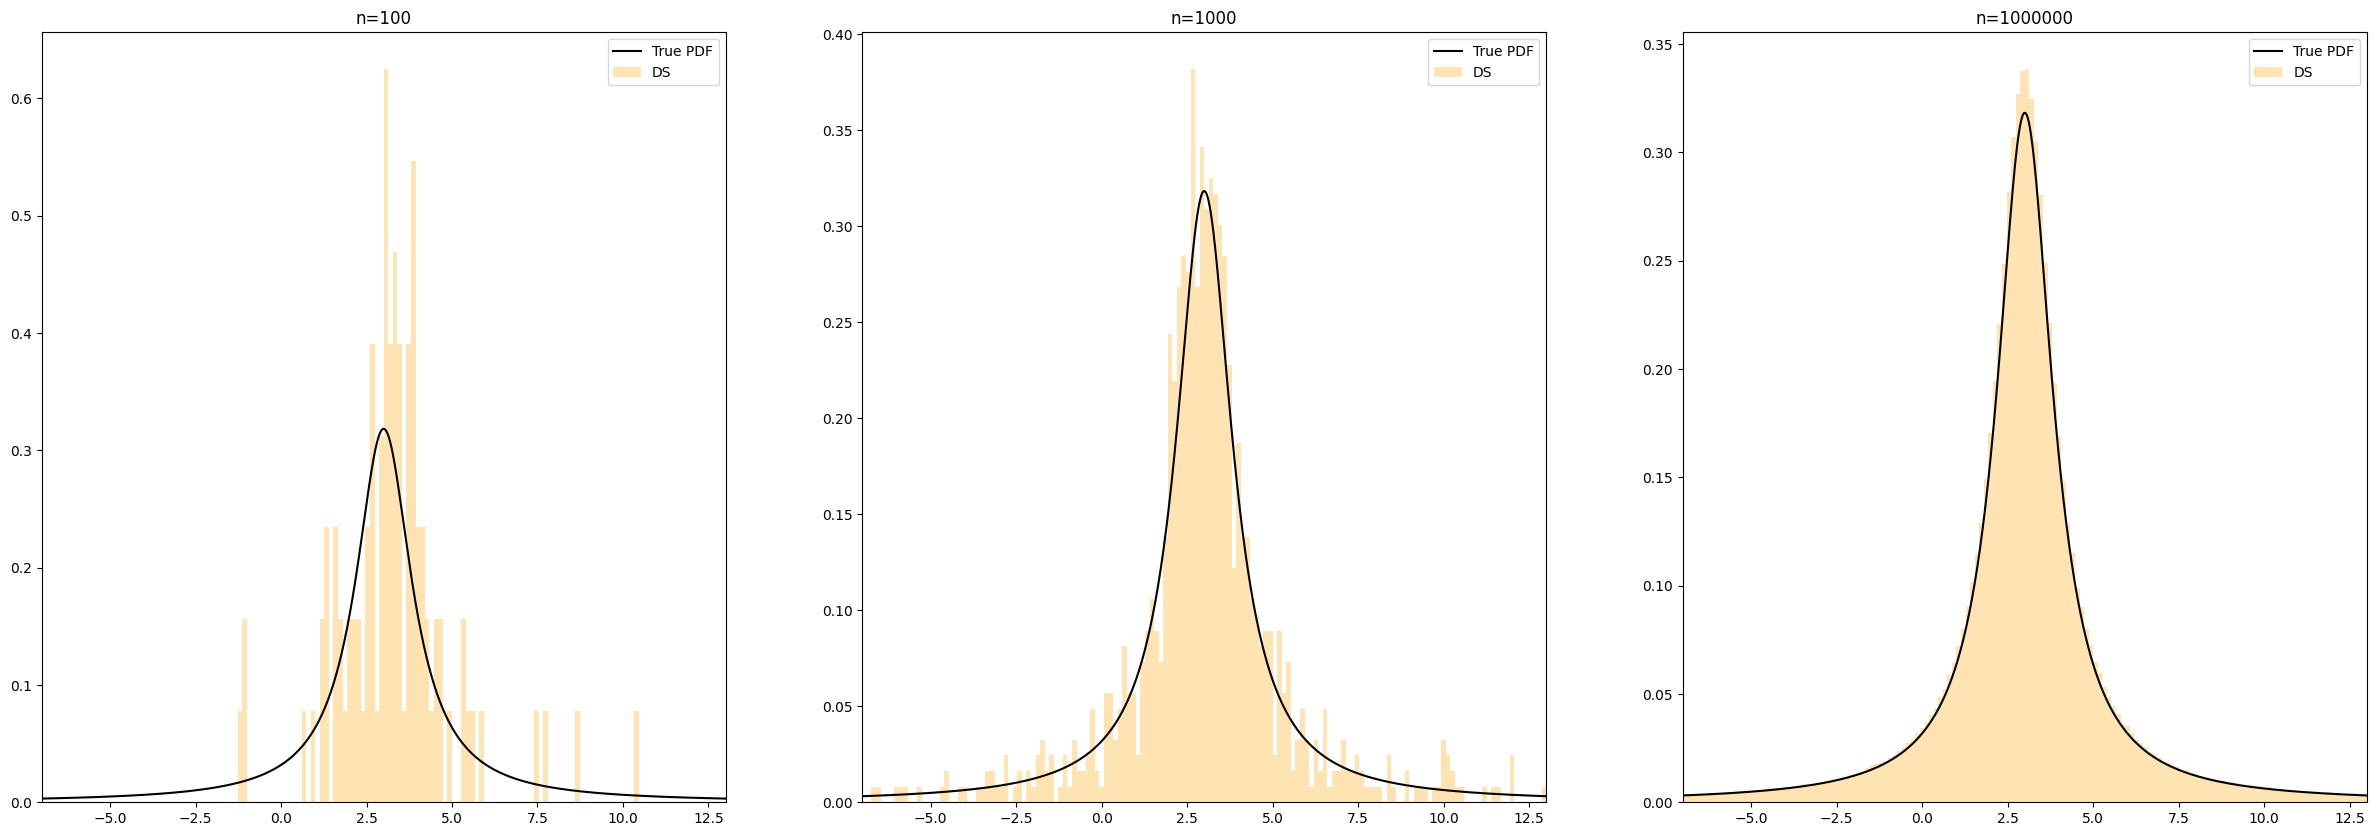

In [21]:
nn = [100, 1000, 1000000]
figure, ax = plt.subplots(1, 3, figsize=(30, 10))

for j, n in enumerate(nn):
    xx_true = np.linspace(-7, 13, 1000)
    yy = []
    for x in xx_true:
        y = (1/np.pi)/(1+(x-3)**2)
        yy.append(y)
    

    xx_direct_sampling = []

    for i in range(n):
        r = random.uniform(0,1)
        x = 3 + np.tan(np.pi*(r-0.5))
        xx_direct_sampling.append(x)
    
    
    ax[j].plot(xx_true, yy, color='k', label='True PDF')
    ax[j].hist(xx_direct_sampling, bins = 150, density=True, range=[-7,13], color='orange', alpha = 0.3, label='DS')
    ax[j].set_xlim(-7,13)
    ax[j].set_title("n={}".format(n))
    ax[j].legend()

## d)
With a rejection sampling scheme we don't need to invert the CDF:

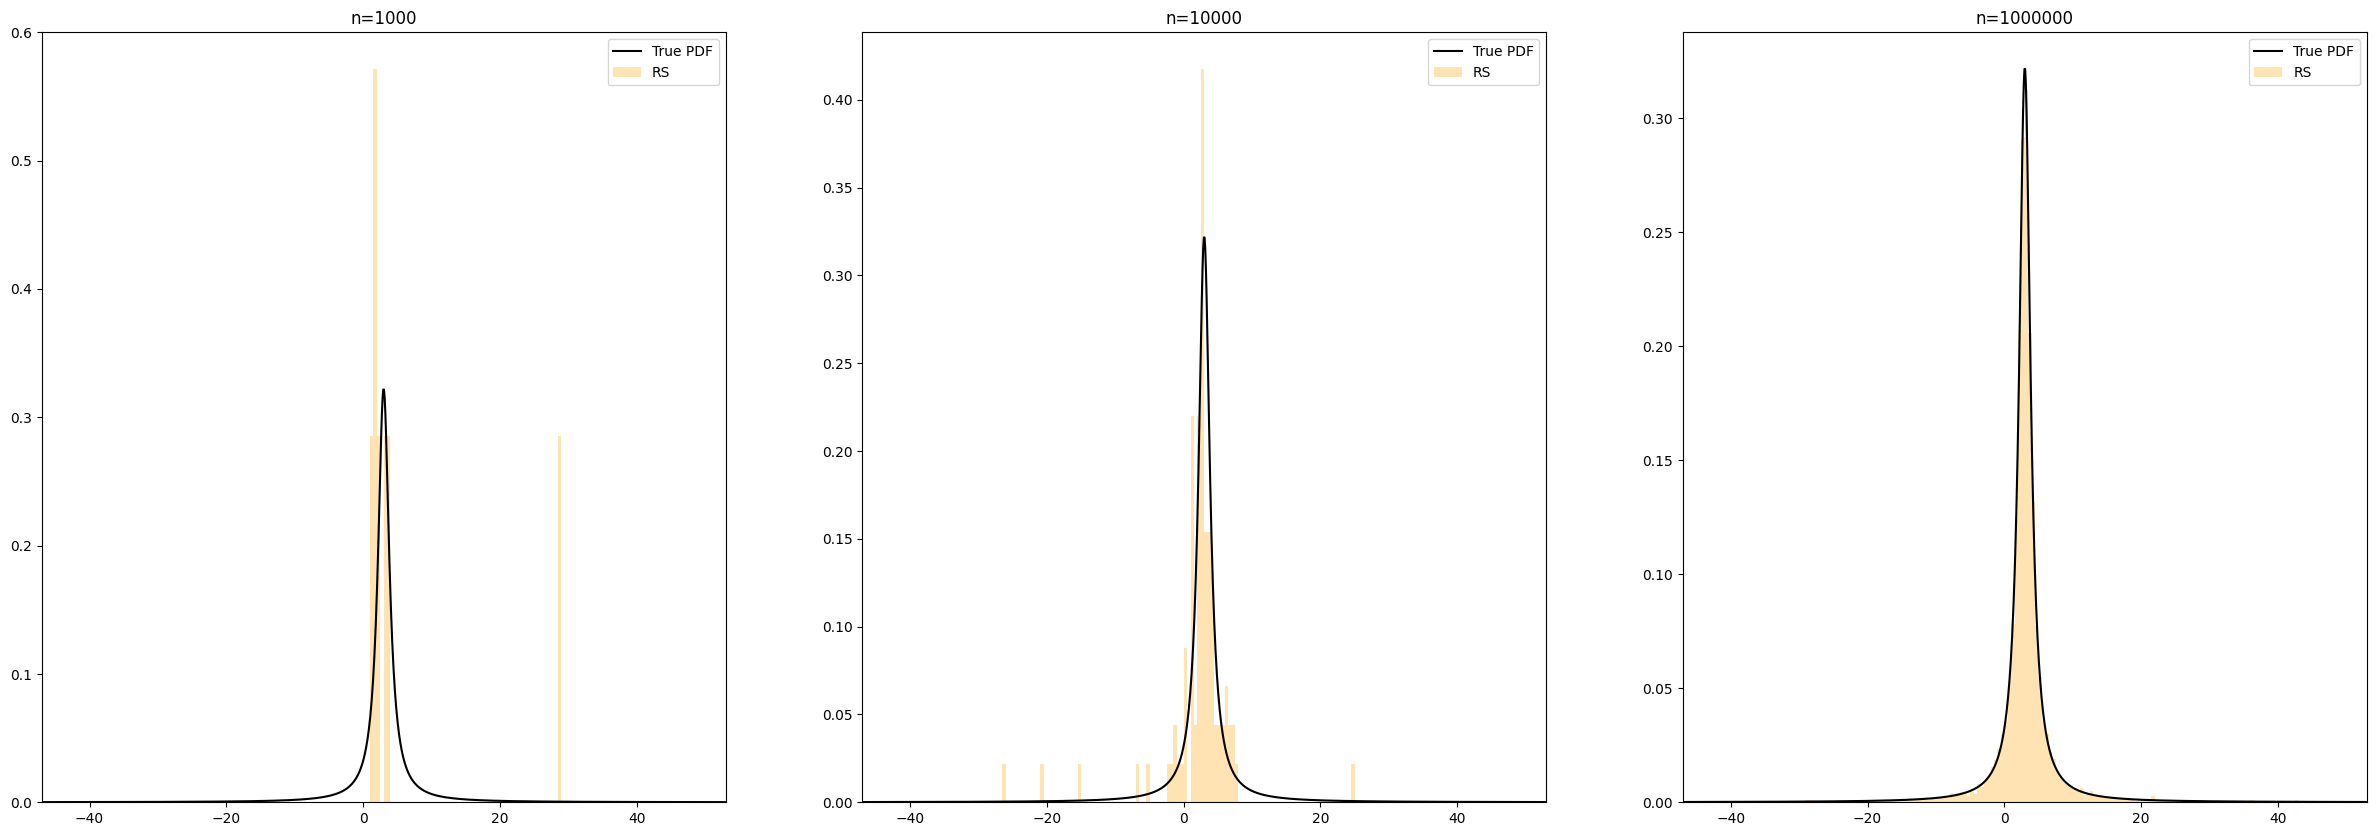

In [22]:
xmin = -47
xmax = 53

xx_true = np.linspace(-47, 53, 1000)
yy = []
for x in xx_true:
    y = (1/(2*np.arctan(50)))/(1+(x-3)**2)
    yy.append(y)
    
nn = [1000, 10000, 1000000]
figure, ax = plt.subplots(1, 3, figsize=(30, 10))

for j,n in enumerate(nn):
    xx_rejection_sampling = []

    for i in range(n):
        r1 = random.uniform(0,1)
        r2 = random.uniform(xmin, xmax)
    
        f_r2 = (1/(2*np.arctan(50)))/(1+(r2-3)**2)
    
        if r1 <= f_r2:
            xx_rejection_sampling.append(r2)
            
    ax[j].plot(xx_true, yy, color='k', label='True PDF')
    ax[j].hist(xx_rejection_sampling, bins = 200, density=True, range=[xmin,xmax], color='orange', alpha = 0.3, label='RS')
    ax[j].set_xlim(xmin,xmax)
    ax[j].set_title("n={}".format(n))
    ax[j].legend()

The efficiency of the scheme is given by the ratio of the number of sampled points over all the random number picked from the y axis. In the default case where we sample r1 from $[0,1]$ (for the last case) is:

In [23]:
print("Efficiency: {:.1f}%".format(100*len(xx_rejection_sampling)/n))

Efficiency: 1.0%


An easy way to increase the efficiency of the scheme is to restrict the sampling of r1 to $[0,0.4]$, here is the result:

In [24]:
xx_rejection_sampling = []

for i in range(n):
    r1 = random.uniform(0,0.4)
    r2 = random.uniform(xmin, xmax)

    f_r2 = (1/(2*np.arctan(50)))/(1+(r2-3)**2)

    if r1 <= f_r2:
        xx_rejection_sampling.append(r2)

In [25]:
print("Efficiency: {:.1f}%".format(100*len(xx_rejection_sampling)/n))

Efficiency: 2.5%


.